<h1>D208 - Predictive Modeling (Task 2)</h1>
<h2>By: Jacob Colp</h2>

<h3>A1.</h3>

Will a patient be a long-term or short-term stay on their initial admin?

To make it more apparent how this will be answered with logistic regression - we will define longterm stay as >7 days. Then we can use feature engineering to classify the patients that we have data on. Therefore - a True value would be a long-term stay and a False value would be short-term. We have implemented something similar on my team at work. It uses a more advanced classification model, but we have implemented the model for hospice patients. We found it far more beneficial in a clinical setting and more accurate than attempting to estimate the actual number of days a patient would be in hospice. Kind of morbid, but it does help greatly in informing care strategy.

<h3>A2.</h3>

The ultimate goal of my data analysis will be to identify key features in classifying patients as long-term or short-term stay patients. This is a slight itteration (or generalization - depending on how you view it) on the linear model that I implemented in the first assessment. The ideal outcome would be to implement this model in a clinical setting in a way that can inform patient care. From attending nursing school - it is well known in the medical space that a patients perception of the environment can greatly impact recovery. If a caretaker knows that a patient is going to spend an extended time in their care - it may be beneficial to make certain changes in the way they are cared for. Can we be less aggressive in our assessments to allow them time to rest? Can we have their family bring in things from home that make them feel comfortable? Can we have better continuity of care so they have time to build relationships with their care team? Can we stagger procedures to reduce stress? All of these are critical decisions that can greatly impact patient outcomes. If a patient can be classified based off of data gathered during an initial assessment - the decisions can be made earlier and hopefully improve patient outcomes and experience.

<h3>B1.</h3>

There are 5 basic assumptions within the implementation of a logistic regression model. The assumptions are as follows: 

<li>Response variable is binary: In simplest terms - this going to mean that our dependent vraible has one of two outcomes. One outcome is going to be affirmative and one will indicate opposition. Some examples of that would 1 and 0, or True and False, etc.. In our research question - this will be indicated by long-term stay or short-term stay. Our affirmative response being long-term.</li>
<li>Observations are independent: This is going to mean that our observations are not repeating. We are not going to have duplicate individuals. Each person gets one measurement and one measurement only.</li>
<li>No Multicollinearity in Independent Variables: This assumption has a big word, so it is perhaps the most intimidating at this juncture. However, I believe it is easiest to understand with an example from our current dataset. When choosing variables to feed our model - we are looking for variables that provide unique information. Variables that provide unique variance. Take a look at initial days and total charge. Their variance is almost identical. However, when you stop to think about it - that makes perfect sense! They are effectively communicating the same and the longer you stay in the hospital - the more it is going to cost.</li>
<li>No Extreme Outliers: This is going to be true for most predictive analytics. Edge cases will not benefit a model and may only serve to confuse a given model.</li>
<li>Sufficient Sample Size: A logistic model is going to assume that there is an appropriate amount of observervations for different outcomes within our independent variables. The more rare a given outcome - the the fewer observations needed. The calculation to decide if we do in fact have a large enough sample size is the number of independent variables (i.e. 7) multiplied by 10 and divided by the probablity of the least frequent outcome (i.e. 30%). Written out - this would like (7*10)/.30 = 233. So, in this instance - we would need 233 observations of our rare combination.
<br>



(https://www.voxco.com/blog/logistic-regression-assumptions/)

<h3>B2.</h3>

I have utilized Python for all of my projects leading up to this point. The most base reasoning for that is its flexibility. In a real world setting - it is significantly to implement systems built in Python. In theory it would allow us to easily build applications for end users to interact with our outcomes. Python is far more prevelant in environments where scalability is a consideration (i.e. hospitals). Within the market - R tends to be more niche for academia and pure statistics. My team and I have utilized R from time to time, but that is mostly in one-time analysis problem sets where we are less concerned with the deliverable.

Outside of its flexibility - there is also an awesome community of people who dedicate a lot of time to developing packages for Python. A nice explanation of some packages that will be seen within this project can be found here: https://towardsdatascience.com/3-top-python-packages-to-learn-statistic-for-data-scientist-d753b76e6099. Leveraging these packages gives me, as an end-user, a very easy interface to perform my analysis. Using Scikit-Learn, you could very easily instantiate and train a model in just a few lines of code! Pandas and Numpy give me a great interface to ask, and answer, questions of my data. The dataframe implementation makes data feel familiar in its tabular form. Finally, packages like Seaborn and Matplotlib give great visualizations that can be created in just a single line of code.

In short - I find Python to be flexible, yet powerful. The syntax is second nature and allows me to make data meaningful to an external stakeholder. I can give them ways to touch and tinke with data, that don't require them to have knowledge of a programming language. Throw a plotly visualization into a quick flask app - suddenly you have an interactive playground for data. And, all of it can be done in less than 50 lines of code.

<h3>B3.</h3>

My research question is simply trying to categorize patients. Is this patient going to be here for an extended period of time? Yes or no? 1 or 0? Logistic regression is utilized within these types of problem sets. It is a model that seeks to categorize observations based upon historical data. Within a clinical setting - it gives caretakers the ability to make quick decisions. Were this to be applied in a real world scenario - we could present a simple yes or no prediction within a patients chart. Do we expect this patient to be with us for a time greater than a week? Yes or no? That type of quick data point can inform everything from the first to the last interaction and it can be communicated very quickly. It isn't ambiguous. There is no middle ground.

Additionally - I have knowledge of the efficacy of a linear regression model with this dataset (from my previous project). It yielded lackluster results at best. However, perhaps by bringing it up a level, in terms of specificity - we can provide true benefit to our stakeholders.

(https://learn.g2.com/logistic-regression)

In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
med_df = pd.read_csv(r'medical_clean.csv')

med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
med_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
#Essentially boiler plate code at this point. I have just copy and pasted this from my D207 project
#This just renames our survey question columns to be less ambiguous

med_df.rename({'Item1':'Survey_Timely_Admission', 'Item2':'Survey_Timely_Treatment', 'Item3':'Survey_Timely_Visits', 'Item4':'Survey_Reliability', 'Item5':'Survey_Options', 'Item6':'Survey_Hours_of_Treatment','Item7':'Survey_Courteous_Staff', 'Item8':'Survey_Evidence_of_Active_Listening'},axis=1, inplace=True)

med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [7]:
#Essentially boiler plate code at this point. I have just copy and pasted this from my D207 project
#This encodes categorical variables into numeric values. For our binary - it replaces yes and no with 1 and 0. For complication risk - it encodes High, Medium and Low with ordinal values of 1,2, and 3. I then print out the value counts again to verify its implementation.

med_df.Complication_risk.replace({'High':3,'Medium':2,'Low':1}, inplace=True)

for x in med_df:
    if med_df[x].dtype == 'object':
        med_df[x].replace({'Yes':1,'No':0}, inplace=True)
    else:
        continue

for x in med_df:
    print(med_df[x].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: CaseOrder, Length: 10000, dtype: int64
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: Customer_id, Length: 10000, dtype: int64
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a646cec157e    1
4767cd0e-626d-4c5a-834e-a948aba315c2    1
8b1e1ea3-e596-4a97-b2cb-7f9926e9fbee    1
bc482c02-f8c9-4423-99de-3db5e62a18d5    1
Name: Interaction, Length: 10000, dtype: int64
3a83ddb66e2ae73798bdf1d705dc0932    1
5d85418e862aab28ed18975446153694    1
28970195a839f74e572d2f43bd7fcb71    1
24665d1c5070b579d0c19

In [8]:
#This will be the code to feature engineer our dependent variable
#We will classify our patients by their initial length of stay - either being greater than 7 days or shorter.

med_df['Long_Term_Stay'] = med_df['Initial_days'].apply(lambda x: 1 if x > 7 else 0)

#We can print out our value counts here and see that our apply properly mapped 1 and 0's to the appropriate observations to be utilized as our dependent variable
med_df['Long_Term_Stay'].value_counts()

1    7810
0    2190
Name: Long_Term_Stay, dtype: int64

<h3>C1.</h3>

This will mark the midway point for my data preparation. Given pre-existing knowledge of the dataset - I am aware that it is clean and has no need for imputation (no missing values). However, I have made a few adjustments to the data to better fit my preference. I find that having numeric values is easier to work with in the totality of a given project. It also communicates an ordinal value for model to better interpret relationship. Additionally - I have converted Yes and No values to binary values. While not necessarily required for specific models - it does keep interactions more consistent. Following that step - I went ahead with our feature engineering to generate the long-term and short-term categorization of our existing records. Post this commentary - I will implement feature scaling to limit impact of different scales amongst the different variables. Then I will split the dataset into a training and test set to allow for validation of the model. Additionally, I will run some checks to ensure that logistic regression assumptions are met (namely multicolinearity). The goals and preparation will remain similar to the previous to our previous implementation of linear regression.

(https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html)

<h3>C2.</h3>

Summary statistics can be found in the second cell following our imports. They will be output from the describe method. That said - I believe it would be a bit excessive to try and have meaningful discussion surrounding the summary statistics for all of our variables. Therefore, I would like to point out some interesting behavior and draw attention to the inherent limitations of summary statistics. First, I would like to draw your attention to a few means. If you take a look at both population and income - there is a very broad range of values. With minimums in the hundreds and maximums in the hundreds of thousands. Income's mean feels a bit more believable than population, but both feel to poorly represented by measure of central tendency. In this instance - it may make more sense to group values into ranges and find a median to represent our general population. Ultimately, those measures are meant to represent the studied population, but a mean can be greatly impacted by outliers. And with our extreme variance, evidenced by the large standard deviation - I believe that is what is happening here. Were we to begin making decisions purely off this information - we could end up woefully ill informed.

As an interesting exercise - I am going to reuse the same variables that I selected in my first submission. I am curious if this model will perform better by keeping it more generalized. So, our list of independent variables will be as follows:

<li>Age</li>
<li>Income</li>
<li>VitD_Levels</li>
<li>Doc_Visits</li>
<li>Soft_Drink</li>
<li>HighBlood</li>
<li>Complication_Risk</li>
<li>Overweight</li>
<li>Stroke</li>

To reiterate - our dependent variable will be our "Long_Term_Stay" column we engineered. This is a column filled with binary values that indicate whether a patient stayed more than 7 days in the hospital. Interestingly - we have far more long-term stays than short-term stays. I would have thought we would see more people staying in hospitals less than a week. However, we do have a solid number of observations to start off with.

<h3>C3.</h3>

Outside of the feature engineering that we have implemented - all transformations that have taken place so far are code snippets that I have utilized in the past when working with this dataset. I initially start by renaming the survey items to map to their questions. Then, I replace the complication risks with numeric values to make an ordinal relationship easier to understand for a model. The for loop that follows searches for object data types and then replaces yes and no's with binary values. I do this so that I don't have to go through and specify the columns to do this operation on. Following these operations - I do a quick apply method to create my dependent variable. Post this commentary - I will be implementing a few steps that are more specific to building a regression model. First, I will scale the data to help with the drastically different data scales. Then, I will check for multicollinearity. Finally, I will be splitting our dataset into a training and test set. That should fully prepare us to step right into our logistic regression!

(https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html)

In [22]:
#Here I will be scaling the dataset to better account for the broad distribution of different data object. I will do this utilizing the standard scaler function from scikit-learn's preprocessing module.
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#This is me writing a note to myself to ensure that I inverse the transformation to get accurate predictions on the other side of model training.

scaler = preprocessing.StandardScaler()

med_df_scaled = pd.DataFrame(scaler.fit_transform(med_df[['Age', 'Income', 'Long_Term_Stay', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke']]), columns=['Age', 'Income', 'Long_Term_Stay', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke'])

#Here I am splitting out the outcome variable into its own data frame for the eventual training and test sets
Long_Term_Stay_Df = med_df_scaled.Long_Term_Stay
predictor_variables_df = med_df_scaled.drop('Long_Term_Stay',axis=1)

predictor_variables_df

,Age,Income,VitD_levels,Doc_visits,Soft_drink,HighBlood,Complication_risk,Overweight,Stroke
0,-0.024795,1.615914,0.583603,0.944647,-0.588898,1.202076,-0.168873,-1.562420,-0.498906
1,-0.121706,0.221443,0.483901,-0.967981,-0.588898,1.202076,1.200737,0.640033,-0.498906
2,-0.024795,-0.915870,0.046227,-0.967981,-0.588898,1.202076,-0.168873,0.640033,-0.498906
3,1.186592,-0.026263,-0.687811,-0.967981,-0.588898,-0.831894,-0.168873,-1.562420,2.004386
4,-1.526914,-1.377325,-0.260366,-0.011667,1.698086,-0.831894,-1.538483,-1.562420,-0.498906
...,...,...,...,...,...,...,...,...,...
9995,-1.381548,0.192047,-0.487525,-0.967981,-0.588898,1.202076,-0.168873,-1.562420,-0.498906
9996,1.622691,-0.894380,0.105476,-0.011667,-0.588898,1.202076,-0.168873,0.640033,-0.498906
9997,-0.412438,0.891569,-0.414049,-0.967981,1.698086,1.202076,1.200737,0.640033,-0.498906
9998,-0.509349,-0.378271,0.964820,-0.011667,-0.588898,-0.831894,-0.168873,0.640033,-0.498906


<AxesSubplot:>

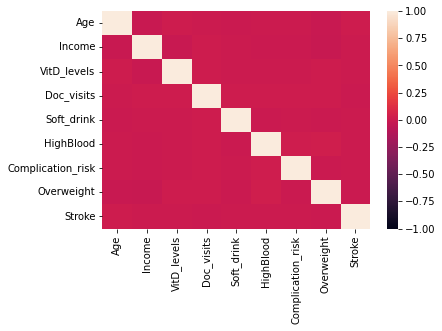

In [23]:
#Here I am generating a heatmap to check for any multicollineartiy. I expand the minimum out to -1 to ensure that we don't have any strong inverse relationships.

sns.heatmap(predictor_variables_df.corr(), vmin=-1.0)

#We've seen this before! We're definitely not seeing any multicollinearity!

In [24]:
#Here I am splitting out the training and test sets for our predictor and outcome variables
#https://realpython.com/train-test-split-python-data/

X_Train, X_Test, Y_Train, Y_Test = train_test_split(predictor_variables_df, Long_Term_Stay_Df)

X_Train.reset_index(drop=True)
X_Test.reset_index(drop=True)
Y_Train.reset_index(drop=True)
Y_Test.reset_index(drop=True)

0      -1.888441
1       0.529537
2       0.529537
3       0.529537
4       0.529537
          ...   
2495    0.529537
2496    0.529537
2497    0.529537
2498   -1.888441
2499   -1.888441
Name: Long_Term_Stay, Length: 2500, dtype: float64

<h3>C4.</h3>

Below you will find the univariate and bivariate visualizations generated. 

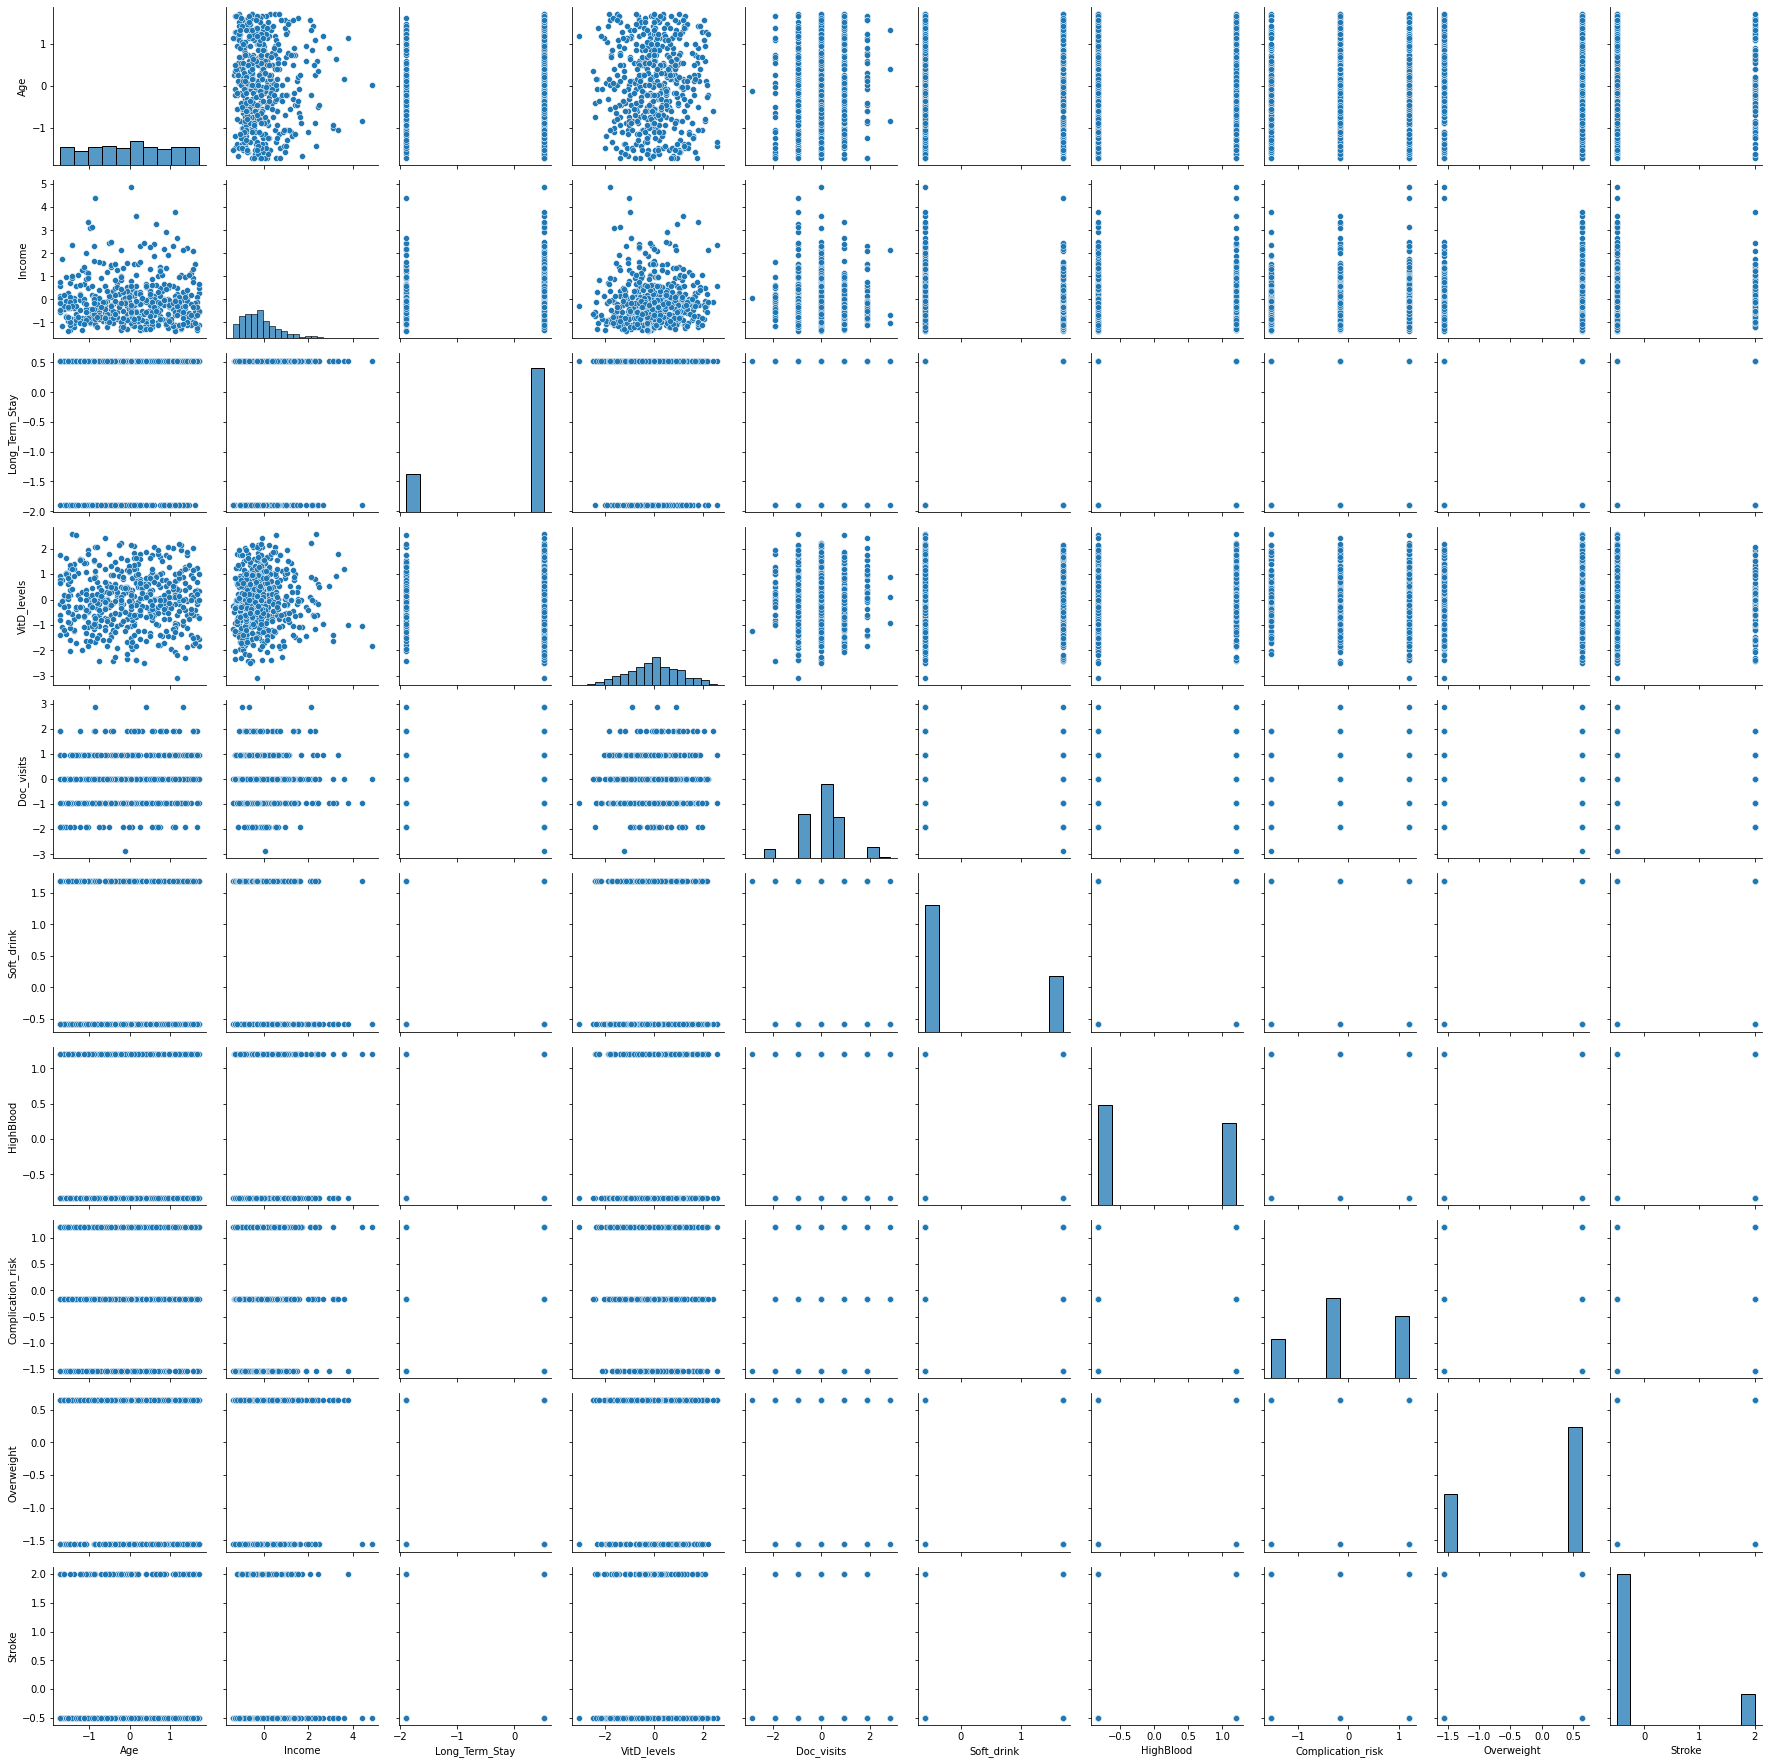

In [25]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
#All Bivariate plots for the cleaned and scaled dataset

g = sns.PairGrid(med_df_scaled.sample(500))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)